# 💻 **PROYECTO DATA SCIENCE: PREDICCIÓN RIESGO CARDÍACO A PARTIR DE UN MODELO DE CLASIFICACIÓN**

***Primera Entrega - Fecha: 15/01/2024***

**Comisión:** 49125

**Alumno:** Martinez Mario Alejandro

## 💗⚕ **ABSTRACT**
> Un **ataque cardíaco** se define como la necrosis isquémica del corazón, generalmente causada por una obstrucción de las arterias que lo irrigan.

Los infartos, y en general, las enfermedades cardiovasculares son la principal causa de muerte tanto en hombres como en mujeres en todo el mundo. Una detección temprana de esta cardiopatía aumentaría las posibilidades de tratamiento y de prevención. Estas patologías no se producen por una única causalidad sino que existen muchos factores de riesgo dentro de los cuales podríamos mencionar otras patologías, como la hipertensión arterial o la diabetes, antecedentes familiares o propios respecto a cardiopatías y hábitos relacionados al ejercicio, el descanso y al día a día de los pacientes.

El dataset analizado nos presenta distintas características de pacientes que constituyen factores de riesgo que pueden desencadenar o influir en la presencia y/o riesgo de una enfermedad cardiovascular. También encontramos una clasificación por edad, sexo y país de nacimiento.

Nuestra investigación estará enfocada en el análisis, estudio y desarrollo de un modelo de clasificación que nos permita predecir, a partir de los datos clínicos, ataques cardíacos. Para este punto mencionamos que existe en el dataset una variable 'target' definida con los valores 1 o 0.

> **El objetivo general del proyecto** será entonces poder desarrollar un modelo según las características de nuestros datos pueda tomarlos como input y devolver esta variable 'target' antes mencionada. Para esto deberemos trabajar sobre distintos modelos de aprendizajes, el cual entendemos en esta instancia corresponde a una técnica de aprendizaje supervisado, para poder lograr e identificar el algoritmo que mejor se adecue según nuestros resultados a este objetivo.

## ❔ **HIPÓTESIS Y PREGUNTAS DE INTERES**

Una hipótesis es una idea que se plantea para explicar un determinado fenómeno o situación y que se intenta comprobar o rechazar mediante la experimentación u otros métodos. Hablando de nuestra hipótesis nula (h0) decimos que:

> Existen uno o más factores de riesgo en los pacientes pacientes que su presencia está relacionada al riesgo de ataque cardíaco.

A partir de lo antes mencionado es que también liberamos nuestra hipotesis alternativa (h1), que contradice o pretende demostrar lo contrario a lo planteado en la 'nula'.

Algunas *preguntas de interes:*

* ¿Qué porcentaje existe de pacientes con riesgo de ataque cardíaco en nuestros datos?
* ¿Cómo es la distribución con respecto al sexo y a la edad de nuestro dataset?
* ¿Existe alguna relación entre el continente registrado para cada paciente y el riesgo de ataque cardíaco?
* ¿Podemos inferir que los hábitos de descanso y ejercicios tienen una relación con la localización geográfica y el riesgo cardíaco?

## 📎 **CONTEXTO ANALÍTICO**
En el data set fue obtenido desde Keaggle, es decir una fuente externa de datos: https://www.kaggle.com/code/raaggeesingh/heart-attack-risk-prediction/input

A continuación realizaremos la importación de librerías y la conexión a la carpeta de drive a través de un path a donde tenemos archivados nuestros entregables.

In [361]:
# Importo librerías
import pandas as pd
import numpy as np

# Librerías para visualizaciones
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Realizo conexión a Google Drive donde previamente guardé mis archivos
from google.colab import drive
import os
drive.mount('/content/gdrive/')

# Defino el path para mis datasets
path = '/content/gdrive/MyDrive/DS-C_49125-Mario_Martinez/Datasets/'

# Utilizo pandas para realizar función read y leer el datasets
df_2 = pd.read_csv(path+ 'Predicción_ataque_cardíaco.csv', sep=",")

# Traemos una primer visualización rápida de nuestro dataset
df_2.head()

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## 🔍 **ANÁLISIS EXPLORATORIO**

Comenzaremos en esta etapa a mapear y analizar los datos y su tipología, la cantidad de registros y una descripción estadística de sus columnas.

In [362]:
# Utilizo atributo shape para obtener más información de mi dataset, se observa que cumple con los requisitos solicitados
df_2.shape

(8763, 26)

In [363]:
# Utilizo atributo columns para tener un registro de las columnas del dataframe
df_2.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

✅ El dataset contiene 26 columnas y 8763 filas, que representan 8763 registros.

In [364]:
# Utlizo atributo dtypes para conocer columnas y tipos
df_2.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

✅ La mayoría del dataset está compuesto por variables númericas enteras. En menor medida encontramos el tipo "object" relacionado a variables categóricas y por último el tipo "float" referido a variables numéricas con decimales.


📔 **Definición de Diccionario de datos**
* 'Patient ID', ID del paciente en registro de datos
* 'Age', númerica - Edad del paciente.
* 'Sex', categórica - Género del paciente.
* 'Cholesterol', numérica - Nivel de colesterol
* 'Blood Pressure', numérica - Presión sanguínea
* 'Heart Rate', numérica - Ritmo cardíaco
* 'Diabetes', categórica - Si el paciente posee diabetes
* 'Family History', categórica - Si tiene antecedentes de problemas cardiacos en la familia
* 'Smoking', categórica - Si es fumador o no
* 'Obesity', categórica - Si es obeso o no
* 'Alcohol Consumption', categórica - Consumo de alcohol
* 'Exercise Hours Per Week', numérica - Horas de ejercicio por semana
* 'Diet', categórica - Habitos alimenticios
* 'Previous Heart Problems', categórica - Antecedentes cardiacos
* 'Medication Use', categórica - Medicación Habitual
* 'Stress Level', numérica - Nivel de estres
* 'Sedentary Hours Per Day', numérica - Horas de actividad sedentaria por día
* 'Income', numérica - Nivel de ingresos del paciente
* 'BMI', numérica - Indice de masa corporal del paciente
* 'Triglycerides', numérica - Nivel de trigliceridos del paciente
* 'Physical Activity Days Per Week', numérica - Actividad Física por días por semana
* 'Sleep Hours Per Day', numérica - Horas de sueño por día
* 'Country', categórica - País de residencia
* 'Continent', categórica - Continente
* 'Hemisphere', categórica - Hemisferio
* 'Heart Attack Risk', categórica - Presencia de riesgo cardíaco

In [365]:
# Utilizo un ciclo for para determinar para cada columna del dataset sus valores unicos (función unique)
for i in range(len(df_2.columns)):
  print(f"Columna:\t {df_2.columns[i]}", df_2.iloc[:, i].unique(), "\n")

Columna:	 Patient ID ['BMW7812' 'CZE1114' 'BNI9906' ... 'XKA5925' 'EPE6801' 'ZWN9666'] 

Columna:	 Age [67 21 84 66 54 90 20 43 73 71 77 60 88 69 38 50 45 36 48 40 79 63 27 25
 86 42 52 29 30 47 44 33 51 70 85 31 56 24 74 72 55 26 53 46 57 22 35 39
 80 65 83 82 28 19 75 18 34 37 89 32 49 23 59 62 64 61 76 41 87 81 58 78
 68] 

Columna:	 Sex ['Male' 'Female'] 

Columna:	 Cholesterol [208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 299
 357 214 370 345 351 344 152 15

✅ Analizando los valores únicos de cada categoría encontramos para trabajar:
* Dropear Patient ID y Hemisphere
* Transformar variables float BMI y Exercise hours for week en int
* Corregir valores 'Australia' en variable Continent por 'Oceania'

In [366]:
# Utilizo método info para conocer las características del dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [367]:
# Utilizo función describe para conocer los principales estadísticos. Traspongo filas por columnas para analizar la información
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


✅ Haciendo un análisis de esta descripción estadística podemos observar el comportamiento de las variables categóricas con valores booleanos entendiendo que si su promedio está más cercano a 1, esa condición de salud o factor de riesgo en los pacientes tendrá una mayor presencia siendo una característica de la muestra. Por ejemplo, la muestra contiene un 89% de personas registradas como fumadores.
Luego las variables numéricas nos irán dando características como que el promedio de persona en nuestra muestra está en los 53 años, BMI de 29 y con un ingreso de 158263 - no se tiene información sobre la moneda en la cual se establecieron estos valores y por ende la correspondencia del tipo de cambio -, que duermen aproximadamente 7hs diarias y realizan 10hs de ejercicios en 3 días a la semana; esto con un nivel de sedentarismo de 6hs por día  . Existe un nivel de estrés cercano a 5/10.

In [368]:
# Utilizo función isna + sum para conocer nulos - Debo ordenar valores de manera descendente para ver columnas con mayor % de nulos
df_2.isna().sum().sort_values(ascending = False)

Patient ID                         0
Age                                0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Blood Pressure                     0
Cholesterol                        0
Sex                                0
Heart Attack Risk                  0
dtype: int64

In [369]:
# Utilizo función duplicated para conocer duplicados
df_2.duplicated().sum()

0

✅ El dataset no presenta valores nulos ni duplicados.
Por lo que no deberemos realizar tratamientos respecto a estos puntos pero incorporaremos la matriz de la libreria missingno para tener una representación gráfica de lo relevado.

<Axes: >

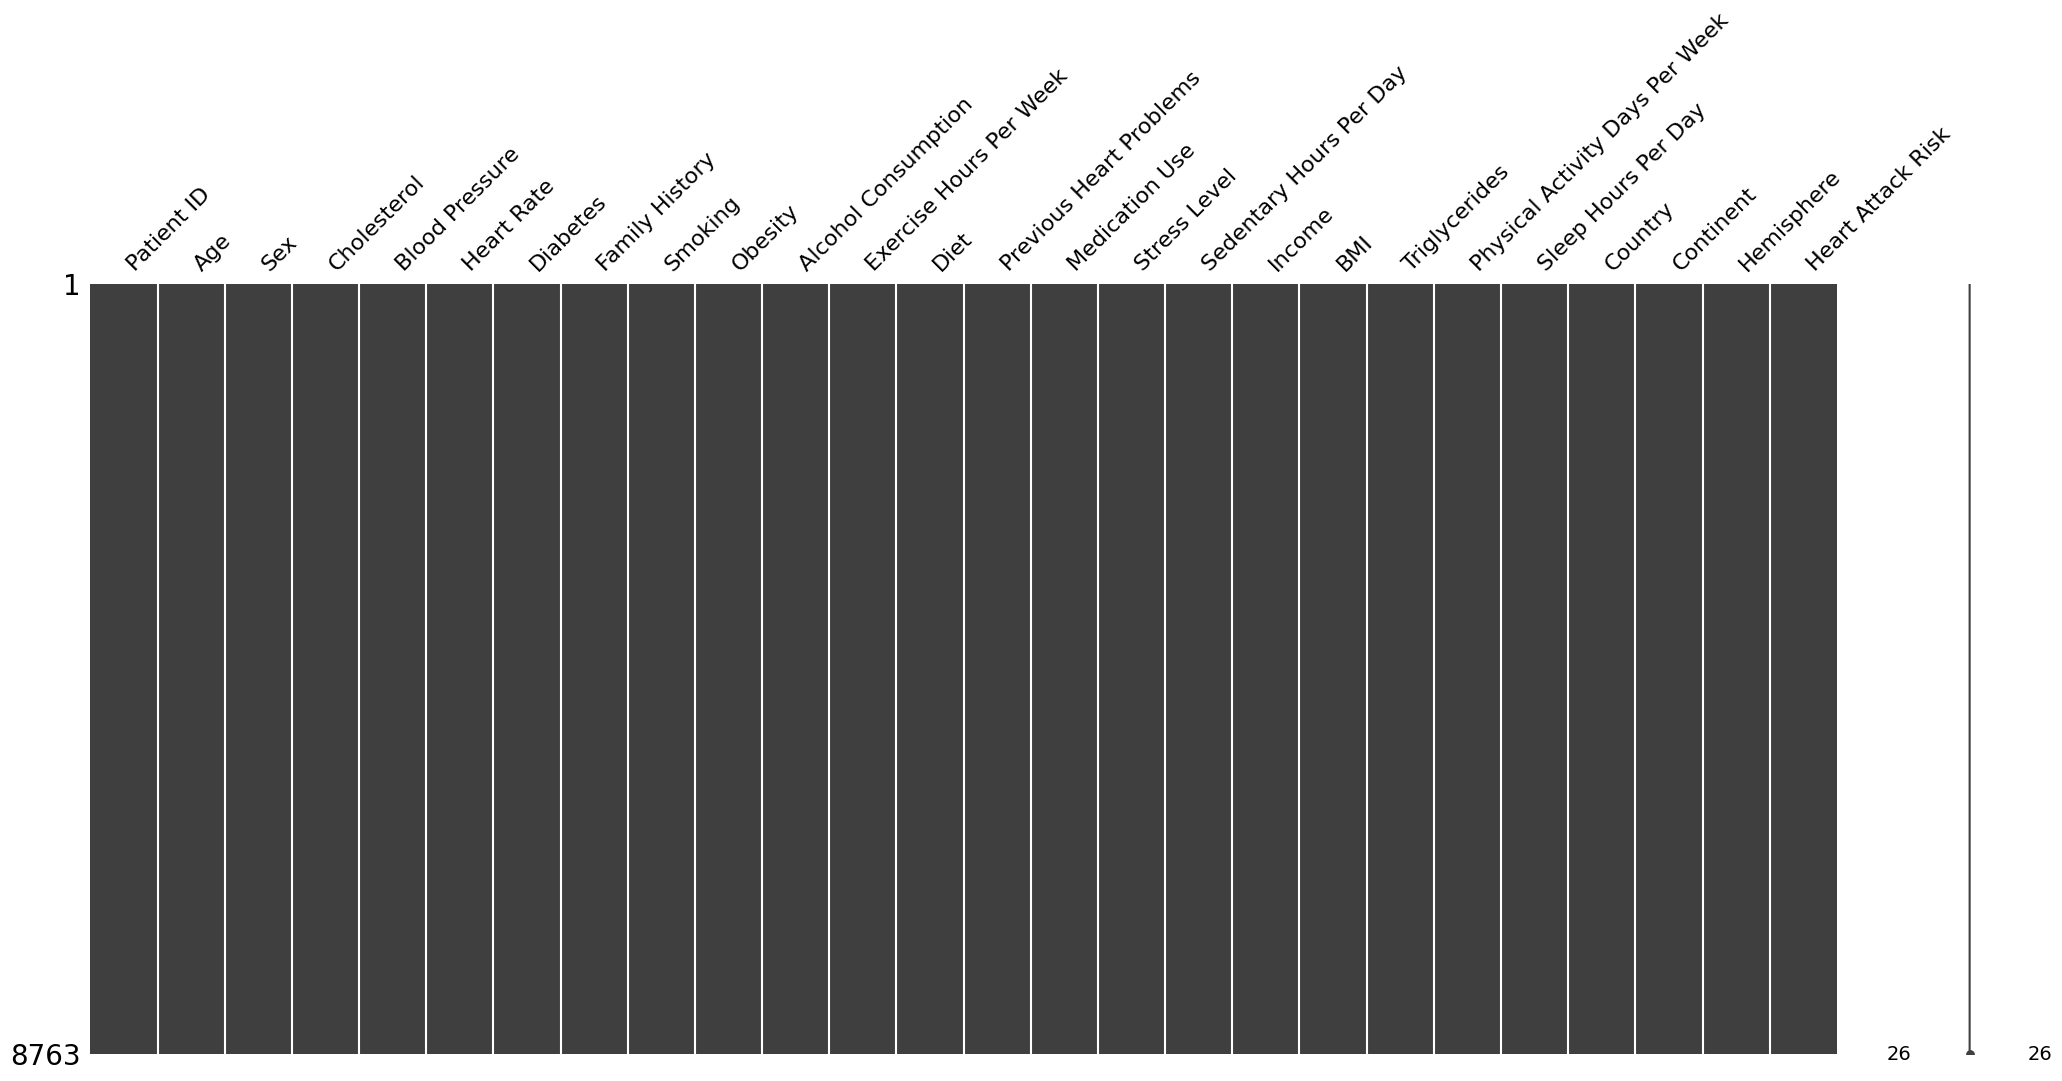

In [370]:
msno.matrix(df_2)

In [371]:
# Dropeo columnas que no serán utilizables para el análisis
df_2 = df_2.drop(['Patient ID','Hemisphere'], axis=1)
df_2

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,8,3.833038,217881,23.993866,617,4,9,Canada,North America,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,0


In [372]:
# Reemplazo en dataframe original el valor Australia por Oceania.
df_2['Continent'] = df_2['Continent'].replace({'Australia': 'Oceania'})
df_2['Continent'].unique()

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Oceania'], dtype=object)

In [373]:
# Reemplazo en dataframe original el valor de la columna BMI redondeada a entero
df_2['BMI'] = df_2['BMI'].round(0).astype(int)
print("Valores para BMI:", df_2['BMI'].unique())

# Reemplazo en dataframe original el valor de la columna Exercise Hours Per Week redondeada a entero
df_2['Exercise Hours Per Week'] = df_2['Exercise Hours Per Week'].round(0).astype(int)
print("Valores para Exercise Hours Per Week:", df_2['Exercise Hours Per Week'].unique())

# Reemplazo en dataframe original el valor de la columna Sedentary Hours Per Day redondeada a entero
df_2['Sedentary Hours Per Day'] = df_2['Sedentary Hours Per Day'].round(0).astype(int)
print("Valores para Sedentary Hours Per Day:", df_2['Sedentary Hours Per Day'].unique())

Valores para BMI: [31 27 28 36 22 20 29 23 32 35 26 25 37 30 38 39 19 34 40 18 24 33 21]
Valores para Exercise Hours Per Week: [ 4  2 10  6  1  3 17  0  8 20 15  9  5 14 11 18 19 12  7 16 13]
Valores para Sedentary Hours Per Day: [ 7  5  9  8  2  1 11  4 10  6  3 12  0]


✅ El principal objetivo de realizar esta conversión del tipo de las variables redondeando sus valores es mejorar la calidad de los datos y que tengan una mayor representación en la incidencia de nuestra investigación. Por ejemplo, si bien el dato númerico del BMI se determina de manera exacta conocemos que este índice tiene una representatividad según rangos que no se definen en el valor de sus decimales.

## 📈 **ANÁLISIS DE VARIABLES**

### 📓 **ANÁLISIS UNIVARIADO**

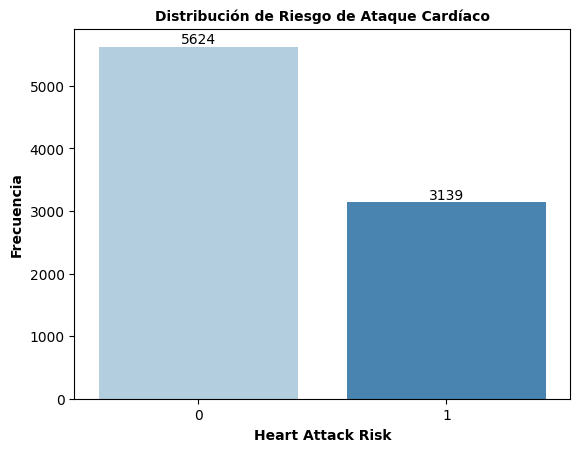

In [374]:
# Distribución de variable Heart Attack Risk - Variable "target"

ax= sns.countplot(x=df_2['Heart Attack Risk'], palette='Blues')
ax.set_xlabel('Heart Attack Risk', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución de Riesgo de Ataque Cardíaco', fontweight = 'bold', fontsize=10)

for et in ax.containers:
        ax.bar_label(et, fontsize=10)

✅ La columna 'Heart Attack Risk' es una variable categórica que nos indica que de nuestro dataset de 8.763 registros, un total de 5.624 personas no presentan riesgo cardíaco aparente mientras que 3.139 personas se encuentran categorizadas con riesgo cardíaco por sus antecedentes. Esta variable la hemos representado en un gráfico de barras junto a su frecuencia absoluta. Para concluir, encontramos la posibilidad de un dataset desbalanceado respecto a su variable 'target'

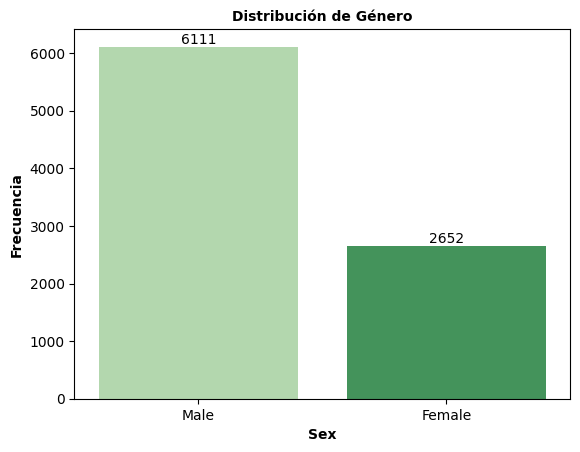

In [375]:
# Distribución de variable Género

ax= sns.countplot(x=df_2['Sex'], palette='Greens')
ax.set_xlabel('Sex', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución de Género', fontweight = 'bold', fontsize=10)

for et in ax.containers:
        ax.bar_label(et, fontsize=10)

✅ La columna 'Sexo' es una variable categórica que nos indica que un total de 6.111 pacientes pertenecen al género masculino mientras que 2.652 pacientes al femenino. Esta variable la hemos representado en un gráfico de barras junto a su frecuencia absoluta

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64


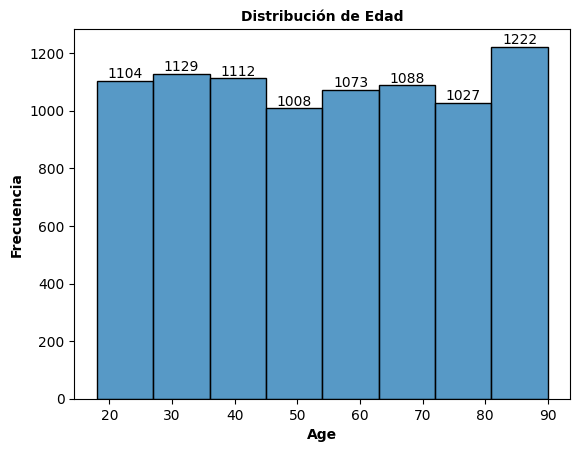

In [376]:
# Distribución de variable Age

print(df_2['Age'].describe())

ax= sns.histplot(x=df_2['Age'], bins=8)
ax.set_xlabel('Age', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución de Edad', fontweight = 'bold', fontsize=10)

for et in ax.containers:
        ax.bar_label(et, fontsize=10)

✅ En la anterior gráfica se observa la distribución de las edades de los pacientes. Teniendo en cuenta que la edad mínima es 18 años y la máxima 90, se establecieron ocho rangos (con el objetivo de lograr una amplitud de 9); esto nos da como resultado que la mayor cantidad de pacientes se encuentran entre los 81-90 años mientras que el menor rango se encuentra entre los 45-54 años aunque entre sus frecuencias absolutas no existe una gran variabilidad.
Esto es porque estamos frente a una variable de distribución uniforme.

Asia             2543
Europe           2241
South America    1362
Oceania           884
Africa            873
North America     860
Name: Continent, dtype: int64


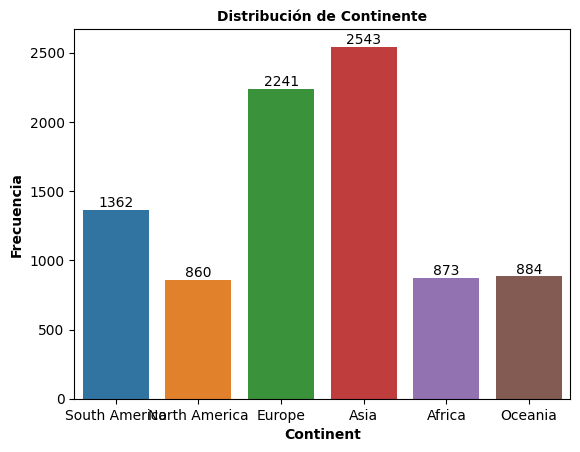

In [377]:
# Distribución de variable Continent

print(df_2['Continent'].value_counts())

ax= sns.countplot(x=df_2['Continent'])
ax.set_xlabel('Continent', fontsize=10, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax.set_title('Distribución de Continente', fontweight = 'bold', fontsize=10)

for et in ax.containers:
        ax.bar_label(et, fontsize=10)

✅ El gráfico nos muestra las mayores frecuencias en los continentes de Asia y Europa respecto a pacientes relevados. Por otra parte la menor proporción de casos se observan en Norte América, África y Australia.

### 📓 **ANALISIS BIVARIADO**

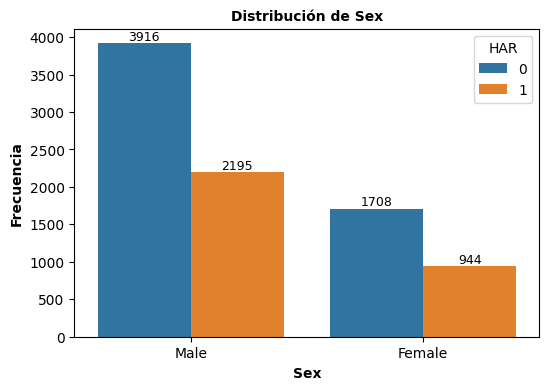

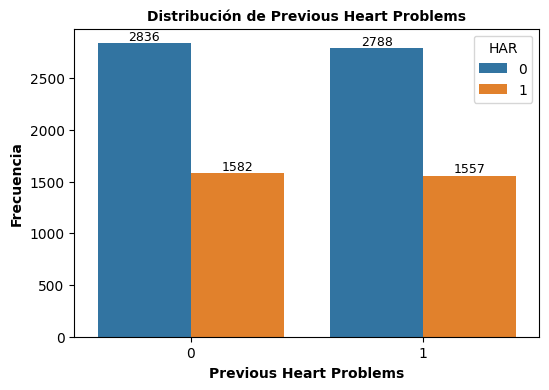

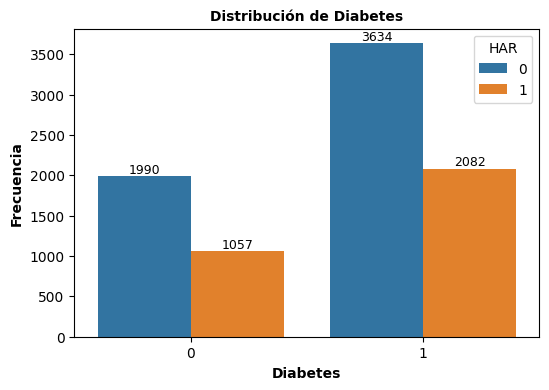

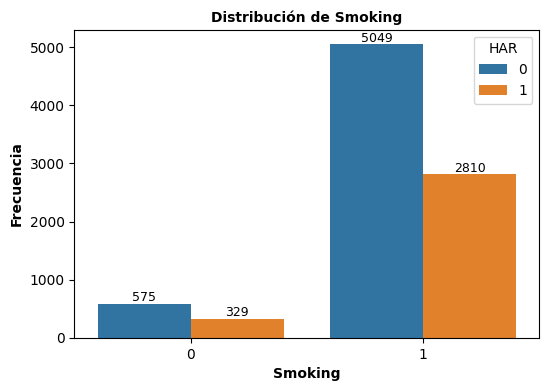

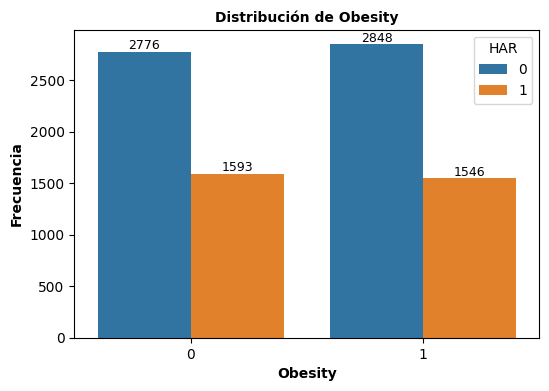

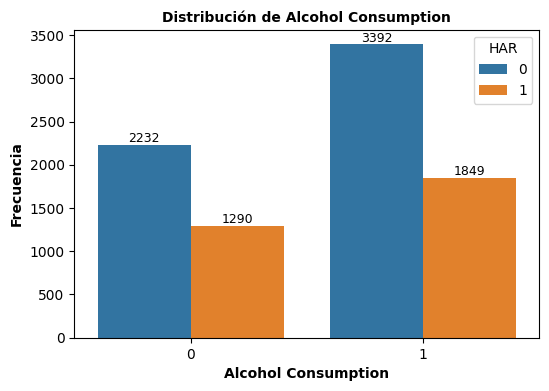

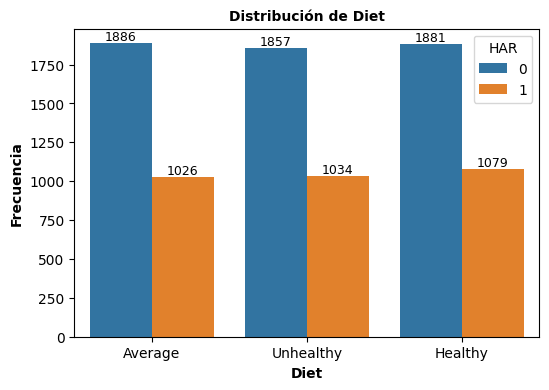

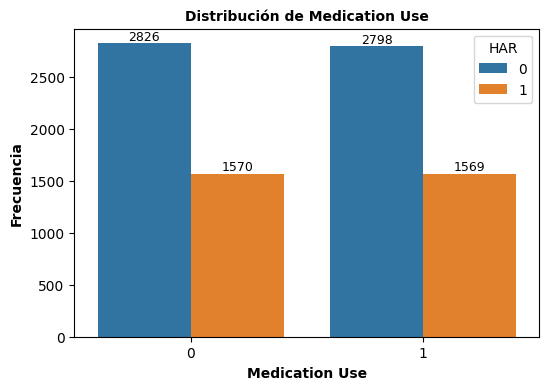

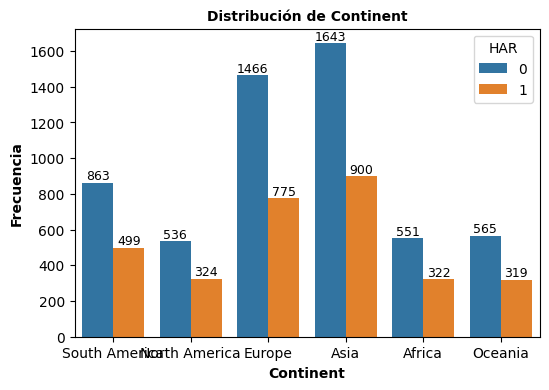

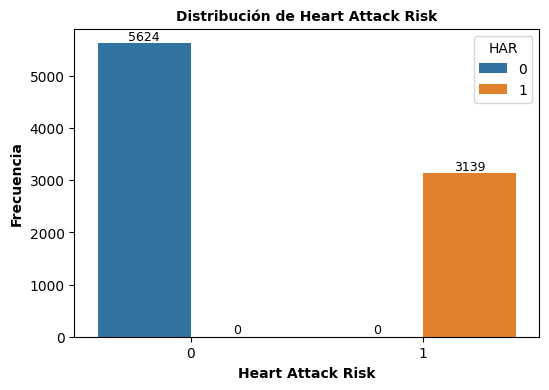

In [378]:
# Lista de columnas categóricas seleccionadas
c_columns = ['Sex', 'Previous Heart Problems', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Medication Use', 'Continent', 'Heart Attack Risk']

# Gráficos de distribución para variables categóricas
for c in c_columns:
    plt.figure(figsize=(6, 4))
    ax= sns.countplot(data= df_2, x= c, hue= 'Heart Attack Risk')
    ax.set_title(f'Distribución de {c}', fontweight = 'bold', fontsize=10)
    ax.set_xlabel(c, fontsize=10, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
    ax.legend(title='HAR', loc='upper right', bbox_to_anchor=(1.0, 1.0))

    for et in ax.containers:
        ax.bar_label(et, fontsize=9)

✅ **Conclusiones:**
* Independientemente del género de la persona existe una mayor proporción de pacientes sin riesgo cardíaco que de aquellos que tienen esta condición.
* Las variables 'Previous Attack Problems', 'Obesity', 'Diet', 'Medication Use' poseen distribuciones y registros similares entre sus categorías.
* Las demás variables observadas presentan un mayor registro positivo (1) que negativo (0) aunque la relación con la variable target presenta similar comportamiento para todas ellas.

In [379]:
#Realizamos un ejemplo donde analizamos el caso de la variable 'Smoking'

df_ej_smoking=df_2[['Sex','Smoking', 'Heart Attack Risk']].groupby(by=['Smoking'],as_index = False).agg(HeartAttackRisk_Count= ('Heart Attack Risk','sum'), Patient_Count= ('Sex','count'))
df_ej_smoking['Pct_Smoking'] = df_ej_smoking['HeartAttackRisk_Count']/df_ej_smoking['Patient_Count']*100
df_ej_smoking['Pct_HeartAttackRisk'] = df_ej_smoking['HeartAttackRisk_Count']/df_ej_smoking['HeartAttackRisk_Count'].sum()*100
df_ej_smoking['Pct_Patient'] = df_ej_smoking['Patient_Count']/df_ej_smoking['Patient_Count'].sum()*100
df_ej_smoking['Heart_vs_Patient'] = df_ej_smoking['Pct_HeartAttackRisk']/df_ej_smoking['Pct_Patient']

df_ej_smoking

,Smoking,HeartAttackRisk_Count,Patient_Count,Pct_Smoking,Pct_HeartAttackRisk,Pct_Patient,Heart_vs_Patient
0,0,329,904,36.393805,10.481045,10.316102,1.015989
1,1,2810,7859,35.755185,89.518955,89.683898,0.998161


✅ En este ejemplo podemos observar la proximidad que existe entre los resultados de los cálculos porcentuales propuestos al analizar los valores 0 y 1 para esta variable:
* El porcentaje de no fumadores con riesgo cardíaco es del 36.39% mientras que para fumadores es del 35.76%.
* En el caso de la proporción relacionándolos al total de la muestra con riesgo cardíaco y al total de pacientes de la muestra, para no fumadores se mantiene un 10% aproximado mientras que para fumadores es un 89%. Esto gráficamente se podría observar en que la proporción para los valores de fumadores con riesgo cardíaco parece ser en escala igual a la que se presenta para los pacientes no fumadores; pero una vez verificado esto con los números podemos concluir que existe esa proximidad en los valores y que no es sólo una interpretación sobre la gráfica.

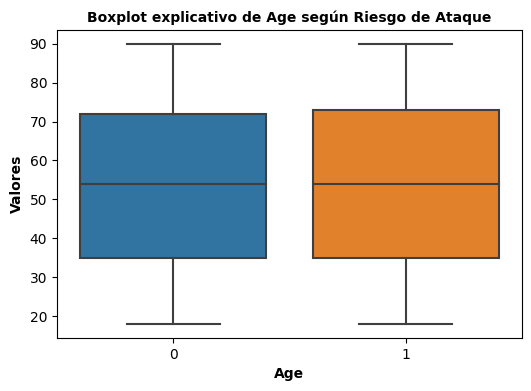

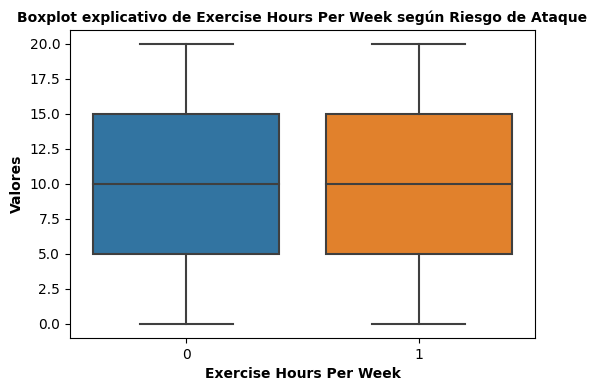

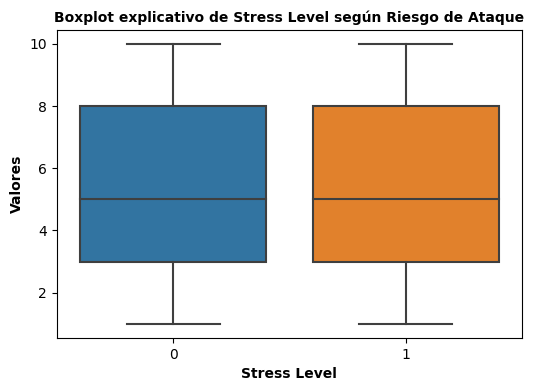

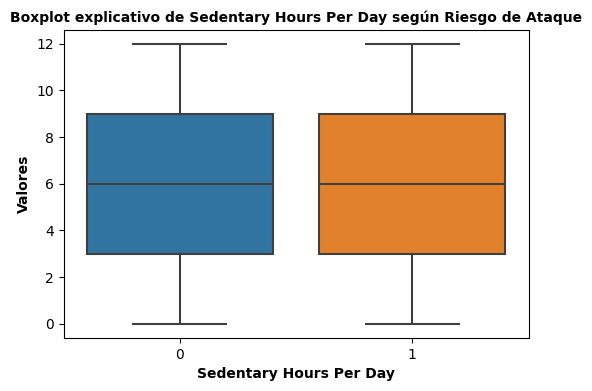

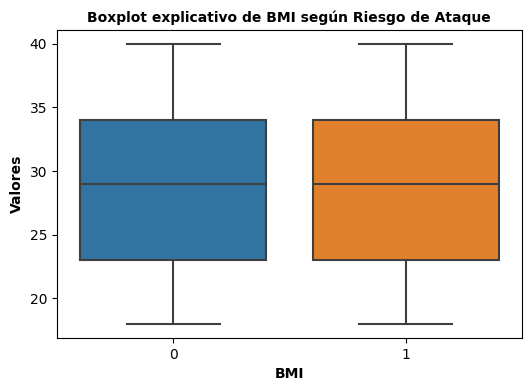

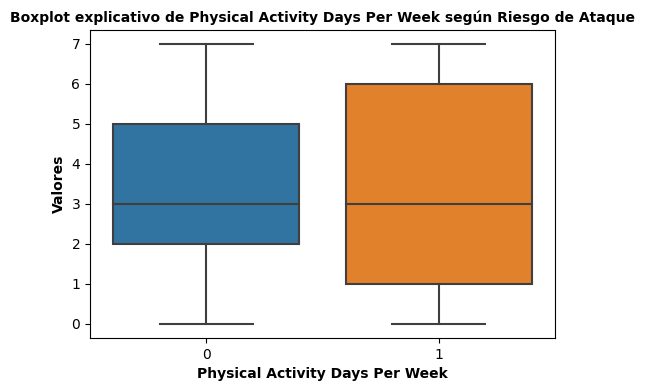

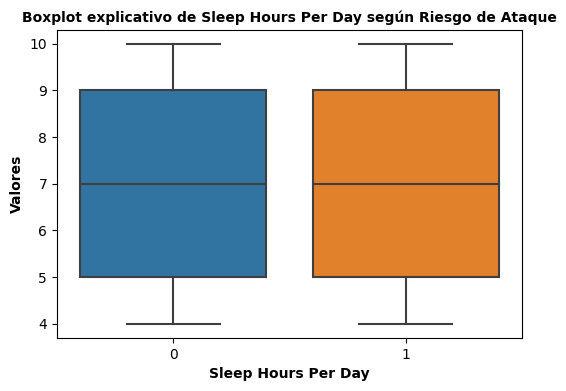

In [380]:
# Lista de columnas numéricas seleccionadas como ejemplo
n_columns = ['Age', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']

# Gráficos de distribución para variables numéricas
for c in n_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data= df_2, y= df_2[c], x= 'Heart Attack Risk')
    plt.title(f'Boxplot explicativo de {c} según Riesgo de Ataque', fontweight = 'bold', fontsize=10)
    plt.xlabel(c, fontweight = 'bold', fontsize=10)
    plt.ylabel('Valores', fontweight = 'bold', fontsize=10)

✅ **Conclusiones:**

Respecto a las anteriores distribuciones graficadas a partir de un boxplot determinamos que en ninguno de sus casos encontramos:
* Outliers por fuera del bloxplot
* Diferencias en las medias de los distintos hábitos de vida cotidiana de los pacientes cualquiera sea su clasificación.

Por último destacamos que observamos una distribución más amplia de los valores en los registros sobre los cuartiles de la cantidad de días con actividad física para el caso de los pacientes con riesgo de ataque cardíaco.

### 📘 **ANÁLISIS PROPUESTOS A PARTIR DE LAS PREGUNTAS DE INTERES**

      Sex  Heart Attack Risk   Age  Har_sex_pct
0  Female                944  2652    30.073272
1    Male               2195  6111    69.926728


Text(0, 0.5, 'Porcentaje de Riesgo de Ataque Cardíaco')

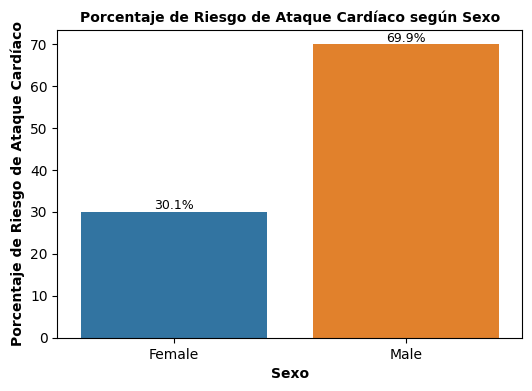

In [381]:
# Porcentaje con riesgo de ataque cardíaco según sexo

df_n2=df_2[['Heart Attack Risk','Sex','Age']].groupby(by=['Sex'],as_index = False).agg({'Heart Attack Risk':'sum', 'Age':'count'})
df_n2['Har_sex_pct'] = df_n2['Heart Attack Risk']/df_n2['Age']
df_n2['Har_sex_pct'] = df_n2['Heart Attack Risk']/df_n2['Heart Attack Risk'].sum()*100
print(df_n2)

plt.figure(figsize=(6, 4))
sns.barplot(y='Har_sex_pct', x='Sex', data=df_n2)

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.title('Porcentaje de Riesgo de Ataque Cardíaco según Sexo', fontweight = 'bold', fontsize=10)
plt.xlabel('Sexo', fontweight = 'bold', fontsize=10)
plt.ylabel('Porcentaje de Riesgo de Ataque Cardíaco', fontweight = 'bold', fontsize=10)

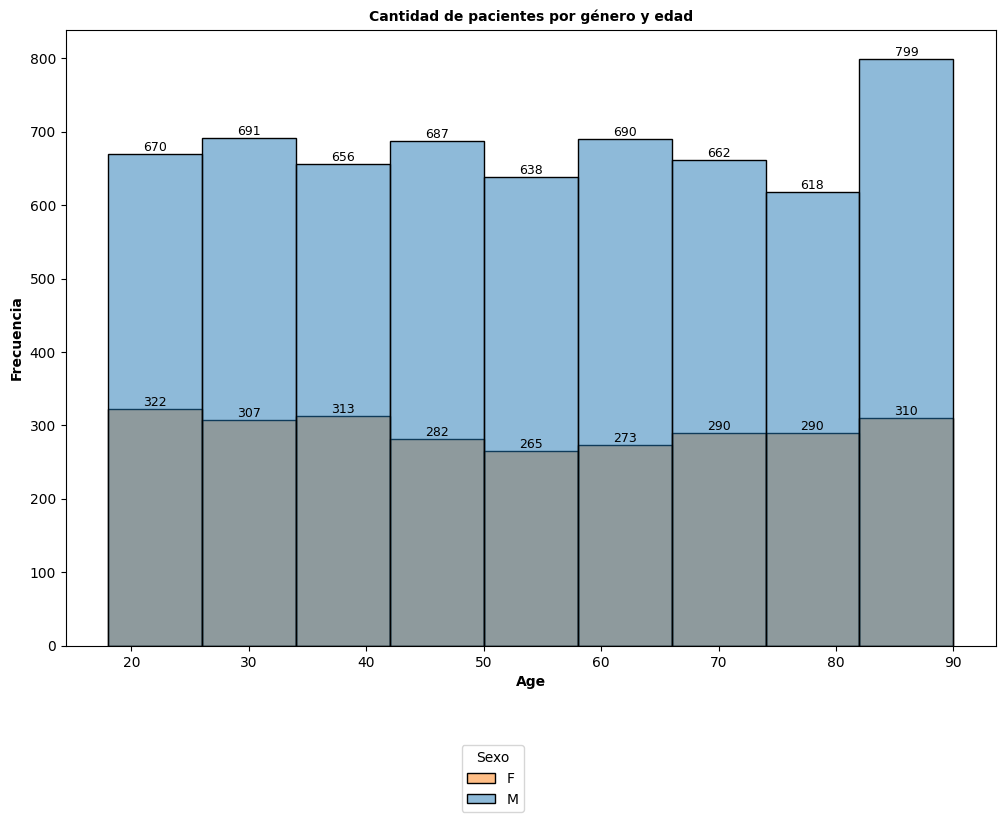

In [382]:
# Distribución por edad y género
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df_2, x="Age", bins=9 , hue='Sex')
ax.set_title("Cantidad de pacientes por género y edad", fontweight = 'bold', fontsize=10)
ax.bar_label(ax.containers[0], fontsize=9)
ax.bar_label(ax.containers[1], fontsize=9)
plt.xlabel("Age", fontweight = 'bold', fontsize=10)
plt.ylabel("Frecuencia", fontweight = 'bold', fontsize=10)
plt.legend(title='Sexo', labels='FM', bbox_to_anchor=(0.5, -0.15))

<Figure size 1200x800 with 0 Axes>

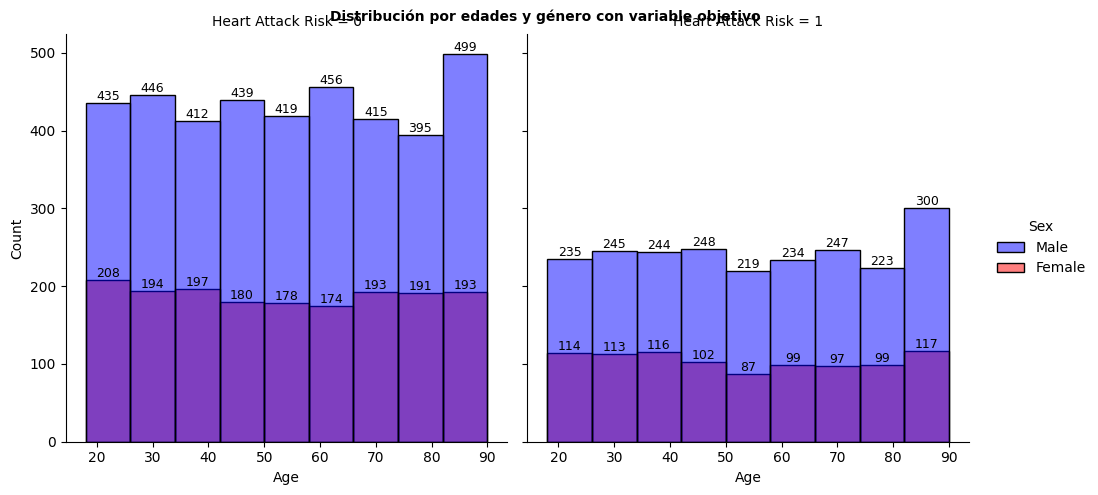

In [383]:
# Observaremos nuevamente la distribución por edades y género pero agregando la variable target

plt.figure(figsize=(12,8))
g = sns.displot(data=df_2, x= 'Age', hue= 'Sex', col= 'Heart Attack Risk', palette=['b', 'r'], bins=9)
plt.suptitle('Distribución por edades y género con variable objetivo', fontsize=10, fontweight='bold')

# Etiquetas de las barras en el primer subplot
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0], fontsize=9)

# Etiquetas de las barras en el primer subplot
for ax in g.axes.flat:
    ax.bar_label(ax.containers[1], fontsize=9)

✅ **Conclusiones:**
* La muestra está compuesta por una menor cantidad de registros para el sexo femenino en todos los intervalos definidos para las distribuciones.
* Se presentan distribuciones uniformes según el género, la edad y la condición cardíaca de los pacientes en cuestión.
* El género masculino representa un 69.9% de la muestra con riesgo cardíaco, el femenino sólo un 30.1%
* La mayor cantidad de registros masculinos son en la edad de 81-90 años mientras que los femeninos se encuentran en el intervalo de 18-27 años.
* Las referencias mencionadas anteriormente se mantienen teniendo en cuenta la condición de 'Sin riesgo Cardíaco".
* Para el caso de pacientes 'Con Riesgo Cardíaco' ambos géneros tocan su máximo en el intervalo de 81-90 años.
* No se observa prueba que indique que las variables estén directamente relacionadas.

<Figure size 1200x800 with 0 Axes>

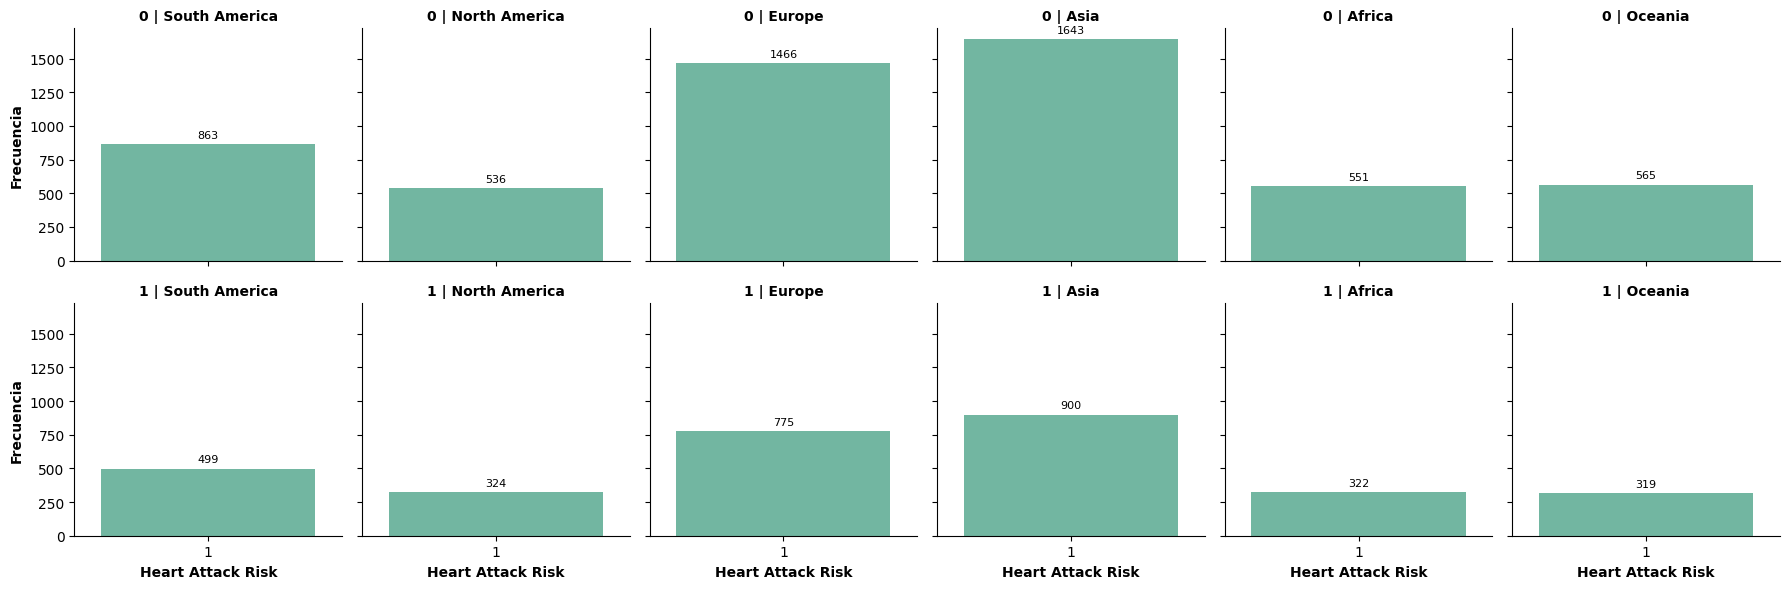

In [384]:
# Distribución por Continente según Condición de pacientes
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data=df_2, col='Continent', row='Heart Attack Risk')
g.map_dataframe(sns.countplot, x='Heart Attack Risk', palette='Set2')

g.set_axis_labels('Heart Attack Risk', 'Frecuencia', fontweight = 'bold', fontsize=10)
g.set_titles(col_template="{col_name}", row_template="{row_name}", fontweight = 'bold', fontsize=10)

for ax, (cont, row) in zip(g.axes.flat, g.facet_data()):
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, color='black', label_type='edge', padding=3)

g.tight_layout()

In [385]:
df_n2=df_2[['Sex','Continent', 'Heart Attack Risk']].groupby(by=['Continent'],as_index = False).agg(HeartAttackRisk_Count= ('Heart Attack Risk','sum'), Patient_Count= ('Sex','count'))
df_n2['Pct_Continent'] = df_n2['HeartAttackRisk_Count']/df_n2['Patient_Count']*100
df_n2['Pct_HeartAttackRisk'] = df_n2['HeartAttackRisk_Count']/df_n2['HeartAttackRisk_Count'].sum()*100
df_n2['Pct_Patient'] = df_n2['Patient_Count']/df_n2['Patient_Count'].sum()*100
df_n2['Heart_vs_Patient'] = df_n2['Pct_HeartAttackRisk']/df_n2['Pct_Patient']

df_n2

,Continent,HeartAttackRisk_Count,Patient_Count,Pct_Continent,Pct_HeartAttackRisk,Pct_Patient,Heart_vs_Patient
0,Africa,322,873,36.884307,10.258044,9.962342,1.029682
1,Asia,900,2543,35.391270,28.671551,29.019742,0.988002
2,Europe,775,2241,34.582776,24.689392,25.573434,0.965431
3,North America,324,860,37.674419,10.321759,9.813991,1.051739
4,Oceania,319,884,36.085973,10.162472,10.087869,1.007395
5,South America,499,1362,36.637298,15.896782,15.542622,1.022786


✅ No se observa en el análisis realizado un continente con una ponderancia porcentual de pacientes con riesgo de ataque cardíaco respecto al resto ya que todos según el segundo análisis realizado posterior a las visualizaciones, se encuentran con un porcentaje entre el 34.5% y el 37.6%.
Por otra parte podemos observar que Asia representa la mayor frecuencia respecto a la cantidad de casos registrados con riesgo cardíaco como también la cantidad total de registros pero realizando un coeficiente entre estos dos aspectos, similar al caso de Europa, sus resultados se encuentran por debajo del valor 1. Esto significa que tienen una mayor representatividad en el total de la muestra que en el total de pacientes con la patología.
La mayor significancia en este último aspecto, es Norte América que representa un 10,32% del total de registros con riesgos sobre un 9,81% de registros totales en la muestra.

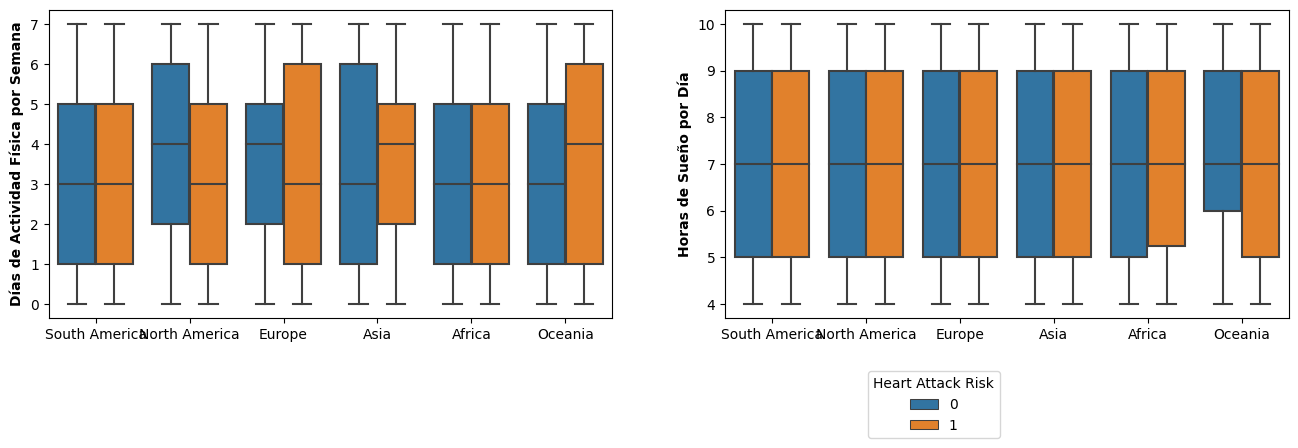

In [386]:
# Defino la figura y configuro para tener los dos gráficos en una sola línea
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Gráfico 1:
sns.boxplot(data=df_2, x='Continent', y='Physical Activity Days Per Week', hue='Heart Attack Risk', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Días de Actividad Física por Semana', fontweight = 'bold', fontsize=10)
ax[0].get_legend().remove()

# Gráfico 2:
sns.boxplot(data=df_2, x='Continent', y='Sleep Hours Per Day', hue='Heart Attack Risk', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Horas de Sueño por Día', fontweight = 'bold', fontsize=10)

# Creamos una leyenda para todos los gráficos
plt.legend(title='Heart Attack Risk', bbox_to_anchor=(0.5, -0.15))

✅ En este caso observamos que:

* En South America y Africa encontramos una paridad respecto a las distribuciones de actividad física de ambas condiciones del paciente.
* En North America y Asia la actividad física es mayor para personas sin riesgo cardíaco.
* Por último en Europa y Oceania las personas con riesgo cardíaco son quienes tienen una mayor distribución de actividad física.

Estos datos deberemos complementarlos con un estudio específico quizás de cada segmentación ya que podemos observar que, por ejemplo, Asia y Oceania comparten media de sus registros con riesgo de ataque; por otro lado Europa y North America también pero cuando el registro es cero.

**Respecto a las horas de sueño de los pacientes** no encontramos variabilidad suficiente en sus distribuciones como para poder concluir que tienen una incidencia en el riesgo, sólo se destaca que los registros sin riesgo en Oceania presentan un cuartil inferior menor al de los demás continentes.

## 🏅 **FEATURE SELECTION**






In [387]:
# Tomamos el df sobre el cuál venimos trabajando y luego aplicamos el one hot encoding para que todas las variables categóricas tomen un valor.
# No se toma en cuenta variable Blood Pressure e Income - drop
df_2_feature = df_2[['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Continent', 'Heart Attack Risk']]

# Aplicar one hot encoding a la columna 'Sex' - Diet - Continent
df_2_feature = pd.get_dummies(df_2_feature, columns=['Sex'], prefix=['Sex'])
df_2_feature = pd.get_dummies(df_2_feature, columns=['Diet'], prefix=['Diet'])
df_2_feature = pd.get_dummies(df_2_feature, columns=['Continent'], prefix=['Cont'])

df_2_feature

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,Cont_Africa,Cont_Asia,Cont_Europe,Cont_North America,Cont_Oceania,Cont_South America
0,67,208,72,0,0,1,0,0,4,0,...,1,1,0,0,0,0,0,0,0,1
1,21,389,98,1,1,1,1,1,2,1,...,1,0,0,1,0,0,0,1,0,0
2,21,324,72,1,0,0,0,0,2,1,...,0,0,1,0,0,0,1,0,0,0
3,84,383,73,1,1,1,0,1,10,1,...,1,1,0,0,0,0,0,1,0,0
4,66,318,93,1,1,1,1,0,6,1,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,8,1,...,1,0,1,0,0,1,0,0,0,0
8759,28,120,73,1,0,0,1,0,17,0,...,0,0,1,0,0,0,0,1,0,0
8760,47,250,105,0,1,1,1,1,3,1,...,1,1,0,0,0,0,0,0,0,1
8761,36,178,60,1,0,1,0,0,4,1,...,1,0,0,1,0,0,0,0,0,1


In [388]:
#Importo librería y método
from sklearn.preprocessing import MinMaxScaler

# Selecciona las características y la variable objetivo
X = df_2_feature.drop('Heart Attack Risk', axis=1)
y = df_2_feature['Heart Attack Risk']

# Aplico a las variables definidas en X
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(X)

# Este metodo trae un array por lo que lo transformo con pandas
X_scaled = pd.DataFrame(features_scaled, columns=X.columns)
X_scaled

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,Cont_Africa,Cont_Asia,Cont_Europe,Cont_North America,Cont_Oceania,Cont_South America
0,0.680556,0.314286,0.457143,0.0,0.0,1.0,0.0,0.0,0.20,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.041667,0.960714,0.828571,1.0,1.0,1.0,1.0,1.0,0.10,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.041667,0.728571,0.457143,1.0,0.0,0.0,0.0,0.0,0.10,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.916667,0.939286,0.471429,1.0,1.0,1.0,0.0,1.0,0.50,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.666667,0.707143,0.757143,1.0,1.0,1.0,1.0,0.0,0.30,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.583333,0.003571,0.300000,1.0,1.0,1.0,0.0,1.0,0.40,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8759,0.138889,0.000000,0.471429,1.0,0.0,0.0,1.0,0.0,0.85,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8760,0.402778,0.464286,0.928571,0.0,1.0,1.0,1.0,1.0,0.15,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8761,0.250000,0.207143,0.285714,1.0,0.0,1.0,0.0,0.0,0.20,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [389]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [390]:
# Importamos librería statsmodels - En estos apartados para no perder la linea del tratamiento en el nb es que dejaremos las importaciones en la sección correspondiente, luego consolidaremos a las primeras entregas
import statsmodels.api as sm

# Definición de función forward selección según lo dado en clases
def forward_selection(data, target, significance_level=0.1):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_best_features = forward_selection(X_scaled,y,significance_level = 0.125)
forward_best_features

<ipython-input-390-7624dcf1f1c8>:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-390-7624dcf1f1c8>:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-390-7624dcf1f1c8>:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-390-7624dcf1f1c8>:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Cholesterol', 'Sleep Hours Per Day', 'Diabetes']

In [391]:
# Definición de función bacward elimination según lo dado en clases

def backward_elimination(data, target,significance_level = 0.125):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

backward_best_features = backward_elimination(X_scaled,y,significance_level = 0.125)
backward_best_features

['Cholesterol',
 'Diabetes',
 'Sleep Hours Per Day',
 'Diet_Average',
 'Diet_Healthy',
 'Diet_Unhealthy',
 'Cont_Africa',
 'Cont_Asia',
 'Cont_Europe',
 'Cont_North America',
 'Cont_Oceania',
 'Cont_South America']

In [392]:
# Definición de función bacward elimination según lo dado en clases

def stepwise_selection(data, target,SL_in=0.125,SL_out = 0.125):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

stepwise_best_features = stepwise_selection(X_scaled,y,SL_in=0.125,SL_out = 0.125)
stepwise_best_features

<ipython-input-392-734f11e0f19e>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-392-734f11e0f19e>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-392-734f11e0f19e>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-392-734f11e0f19e>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Cholesterol', 'Sleep Hours Per Day', 'Diabetes']

In [393]:
# Resumen de los resultados obtenidos en cada uno de los feature selection

print('forward_best_features: ',len(forward_best_features), forward_best_features)
print('backward_best_features: ',len(backward_best_features), backward_best_features)
print('stepwise_best_features:a ',len(stepwise_best_features), stepwise_best_features)

forward_best_features:  3 ['Cholesterol', 'Sleep Hours Per Day', 'Diabetes']
backward_best_features:  12 ['Cholesterol', 'Diabetes', 'Sleep Hours Per Day', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy', 'Cont_Africa', 'Cont_Asia', 'Cont_Europe', 'Cont_North America', 'Cont_Oceania', 'Cont_South America']
stepwise_best_features:a  3 ['Cholesterol', 'Sleep Hours Per Day', 'Diabetes']


In [394]:
model_st = sm.OLS(y, sm.add_constant(X_scaled[stepwise_best_features])).fit()
print(model_st.summary())

                            OLS Regression Results                            
Dep. Variable:      Heart Attack Risk   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.976
Date:                Mon, 15 Jan 2024   Prob (F-statistic):             0.0303
Time:                        22:42:20   Log-Likelihood:                -5988.3
No. Observations:                8763   AIC:                         1.198e+04
Df Residuals:                    8759   BIC:                         1.201e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3440    

**Lectura de resultados**

* const: la constante es 0.34, valor que se espera cuando las variables independientes son 0.
* Cholesterol: es 0.0326. Indica el cambio esperado en la variable dependiente por cada cambio de una unidad en "Cholesterol".
* Sleep Hours Per Day: es -0.0266.
* Diabetes: es 0.0174.

**Estadísticas de ajuste del modelo:**

* El r-squared es 0.001, lo que sugiere que solo el 0.1% de la variabilidad en la variable dependiente es explicada por el modelo.
* El estadístico F es 2.976, y su p-valor es 0.0303.

**Pruebas de hipótesis individuales (P>|t|):**

Los p-valores asociados con los coeficientes individuales indican la significancia estadística de cada variable en el modelo.

**Intervalos de confianza ([0.025 | 0.975]):**
En todos los casos el intervalo de confianza incluye el valor cero, es decir que el coeficiente no es significativamente diferente de cero al nivel de significancia (12.5%). Esto podría sugerir que la variable correspondiente no tiene un efecto significativo en la variable de respuesta.

En resumen, las variables para la muestra seleccionada parecen no ser estadísticamente significativas. Podría ser razonable explorar otras variables o formas de modelar la relación para mejorar la capacidad del modelo para explicar la variabilidad en la variable dependiente.

## 🤖 **MODELOS ANÁLITICOS**

In [395]:
# Instalo última versión de scikit-learn

!pip install --upgrade scikit-learn

In [396]:
# Importo librerías que utilizaremos en esta sección

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [397]:
# Definimos dataset con variables según resultados de feature selection

df_2_model = X_scaled[['Diabetes', 'Cholesterol', 'Alcohol Consumption']]
df_2_model.head()

X_nuevo = df_2_model
y_nuevo = y

print(df_2_model.head())
print(y_nuevo.head())

   Diabetes  Cholesterol  Alcohol Consumption
0       0.0     0.314286                  0.0
1       1.0     0.960714                  1.0
2       1.0     0.728571                  0.0
3       1.0     0.939286                  1.0
4       1.0     0.707143                  0.0
0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64


In [398]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Creamos un modelo Random Forest con parametros por defecto
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)

# Obtenemos las predicciones del modelo con X_test
preds_forest = model_forest.predict(X_test)

In [399]:
# Separamos en entrenamiento/test
X_nuevo_train, X_nuevo_test, y_nuevo_train, y_nuevo_test = train_test_split(X_nuevo, y, test_size=0.3)

# Creamos un modelo Random Forest con parametros según feature selection
model_nuevo_forest = RandomForestClassifier(random_state=42)
model_nuevo_forest.fit(X_nuevo_train, y_nuevo_train)

# Obtenemos las predicciones del modelo con X_nuevo_test
preds_forest_nuevo = model_nuevo_forest.predict(X_nuevo_test)

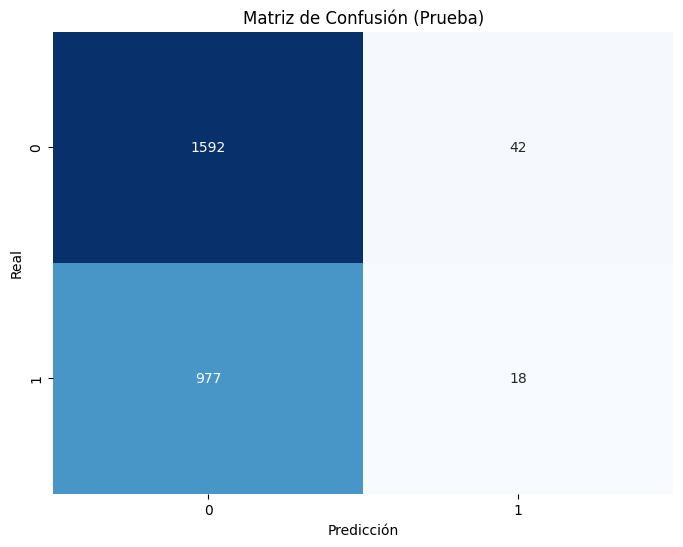

In [400]:
#Random Forest con dataset definido previo al feature selection

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, preds_forest)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=model_forest.classes_, yticklabels=model_forest.classes_)
plt.title('Matriz de Confusión (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

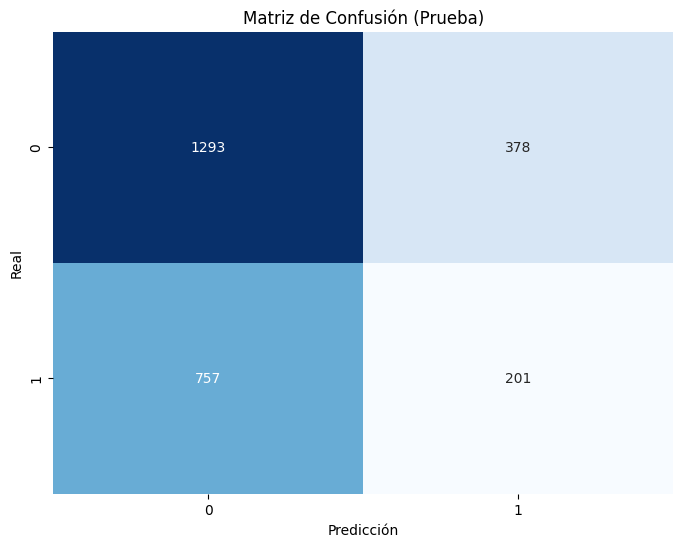

In [401]:
#Random Forest con dataset sólo variables definidas en feature selection

# Calcular la matriz de confusión
confusion_nuevo = confusion_matrix(y_nuevo_test, preds_forest_nuevo)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nuevo, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=model_nuevo_forest.classes_, yticklabels=model_nuevo_forest.classes_)
plt.title('Matriz de Confusión (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [402]:
# Evaluamos precisión
accuracy_rf = metrics.accuracy_score(y_test, preds_forest)
accuracy_nuevo_rf = metrics.accuracy_score(y_nuevo_test, preds_forest_nuevo)
accuracy_rf, accuracy_nuevo_rf

(0.6124001521491061, 0.5682769113731457)

In [403]:
# Precisión se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds_forest, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds_forest, pos_label=0)
print(precision_positiva, precision_negativa)

precision_positiva_nuevo = metrics.precision_score(y_nuevo_test, preds_forest_nuevo, pos_label=1)
precision_negativa_nuevo = metrics.precision_score(y_nuevo_test, preds_forest_nuevo, pos_label=0)
print(precision_positiva_nuevo, precision_negativa_nuevo)

0.3 0.6196963799143635
0.3471502590673575 0.6307317073170732


In [404]:
# Evaluamos recall sensibilidad y especificidad
recall_sensibilidad = metrics.recall_score(y_test, preds_forest, pos_label=1)
recall_especificidad = metrics.recall_score(y_test, preds_forest, pos_label=0)
print(recall_sensibilidad, recall_especificidad)

recall_sensibilidad_nuevo = metrics.recall_score(y_nuevo_test, preds_forest_nuevo, pos_label=1)
recall_especificidad_nuevo = metrics.recall_score(y_nuevo_test, preds_forest_nuevo, pos_label=0)
print(recall_sensibilidad_nuevo, recall_especificidad_nuevo)

0.018090452261306532 0.9742962056303549
0.20981210855949894 0.7737881508078994


In [405]:
# Determinamos f1-score positivo y negativo
f1_positivo = metrics.f1_score(y_test, preds_forest, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds_forest, pos_label=0)
print(f1_positivo, f1_negativo)

f1_positivo_nuevo = metrics.f1_score(y_nuevo_test, preds_forest_nuevo, pos_label=1)
f1_negativo_nuevo = metrics.f1_score(y_nuevo_test, preds_forest_nuevo, pos_label=0)
print(f1_positivo_nuevo, f1_negativo_nuevo)

0.034123222748815164 0.7575541280038067
0.2615484710474951 0.694974469228702


In [406]:
# Se realiza resumen de todas las metricas de una sola vez a través de classification report
print(metrics.classification_report(y_test, preds_forest))
print(metrics.classification_report(y_nuevo_test, preds_forest_nuevo))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76      1634
           1       0.30      0.02      0.03       995

    accuracy                           0.61      2629
   macro avg       0.46      0.50      0.40      2629
weighted avg       0.50      0.61      0.48      2629

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1671
           1       0.35      0.21      0.26       958

    accuracy                           0.57      2629
   macro avg       0.49      0.49      0.48      2629
weighted avg       0.53      0.57      0.54      2629



✅ **Lectura de resultados**

*Primer modelo de RF para dataset por defecto:*
1. Precisión (Precision): El 62% de las instancias predichas como clase 0 fueron realmente de la clase 0; para la clase 1, 30% fueron realmente de la clase 1.
2. Sensibilidad (Recall): El 97% de las instancias reales de la clase 0 fueron identificadas correctamente. Pero sólo el 2% de la clase 1.
3. Puntuación F1 (F1-Score): Para la clase 0 fue 0.76 mientras que para la clase 1: 0.03.

*Segundo modelo de RF para dataset aplicado feature selection:*
1. Precisión (Precision): El 63% de las instancias predichas como clase 0 fueron realmente de la clase 0; para la clase 1, 35% fueron realmente de la clase 1.
2. Sensibilidad (Recall): El 77% de las instancias reales de la clase 0 fueron identificadas correctamente. El 21% de la clase 1.
3. Puntuación F1 (F1-Score): Para la clase 0 fue 0.69 mientras que para la clase 1: 0.26

✅ **Interpretación del resultado:**
* El primer modelo tiene una sensibilidad muy alta para pacientes sin riesgo cardíaco (97%) pero muy baja para los registros positivos (2%). Esto indica que el modelo tiende a predecir de manera efectiva los casos negativos pero tiene dificultades para identificar los positivos.
* El segundo modelo tiene un rendimiento más equilibrado en 'precision' y 'recall' para positivos y negativos pero su precisión general es inferior.
* Ambos modelos muestran limitaciones por lo que deberemos trabajar en el data para obtener una calidad de datos mayor y por ende un mejor rendimiento en los modelos seleccionados.

📢 **NOTA:** No se considera métrica accuracy por el desbalanceo que presenta el dataset.

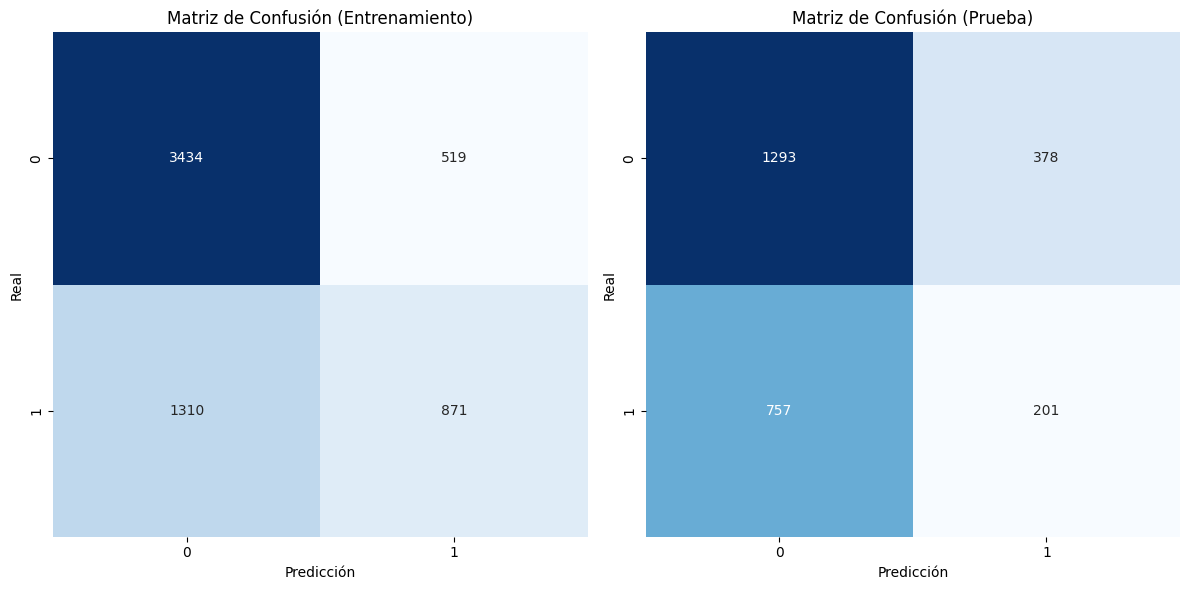

In [407]:
# En este apartado intentaremos dar respuesta a si el modelo tiene problemas de under y/u overfitting

# Realizar predicciones en datos de entrenamiento y prueba
y_train_preds = model_nuevo_forest.predict(X_nuevo_train)

# Crear matrices de confusión
confusion_train = metrics.confusion_matrix(y_nuevo_train, y_train_preds)

# Visualizar las matrices de confusión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_nuevo_forest.classes_, yticklabels=model_nuevo_forest.classes_)
plt.title('Matriz de Confusión (Entrenamiento)')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_nuevo, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_nuevo_forest.classes_, yticklabels=model_nuevo_forest.classes_)
plt.title('Matriz de Confusión (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

In [408]:
print(metrics.classification_report(y_nuevo_train, y_train_preds))
print(metrics.classification_report(y_nuevo_test, preds_forest_nuevo))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      3953
           1       0.63      0.40      0.49      2181

    accuracy                           0.70      6134
   macro avg       0.68      0.63      0.64      6134
weighted avg       0.69      0.70      0.68      6134

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1671
           1       0.35      0.21      0.26       958

    accuracy                           0.57      2629
   macro avg       0.49      0.49      0.48      2629
weighted avg       0.53      0.57      0.54      2629



✅ **Situación de overfitting (sobreajuste) o underfitting (subajuste)**